In [ ]:
# libraries used

import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#load dataset
df = pd.read_csv("test_data.csv")  
df.head()


,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   campaign_id         762 non-null    int64 
 1   sender              762 non-null    int64 
 2   subject_len         762 non-null    int64 
 3   body_len            762 non-null    int64 
 4   mean_paragraph_len  762 non-null    int64 
 5   day_of_week         762 non-null    int64 
 6   is_weekend          762 non-null    int64 
 7   times_of_day        762 non-null    object
 8   category            762 non-null    int64 
 9   product             762 non-null    int64 
 10  no_of_CTA           762 non-null    int64 
 11  mean_CTA_len        762 non-null    int64 
 12  is_image            762 non-null    int64 
 13  is_personalised     762 non-null    int64 
 14  is_quote            762 non-null    int64 
 15  is_timer            762 non-null    int64 
 16  is_emoticons        762 no

In [ ]:
# Probability of click 

p_click = df['target_audience'].mean()
print(f"Probability that a user clicks an email: {p_click:.2%}")


Probability that a user clicks an email: 1164.83%


In [ ]:
#Conditional Probability – Click Given Discount

p_click_given_discount = df[df['is_discount'] == 1]['target_audience'].mean()
print(f"Probability of click given discount: {p_click_given_discount:.2%}")


Probability of click given discount: 1195.83%


In [ ]:
#Conditional Probability – Click Given Personalisation

p_click_given_personalised = df[df['is_personalised'] == 1]['target_audience'].mean()
print(f"Probability of click given personalised email: {p_click_given_personalised:.2%}")


Probability of click given personalised email: 1145.45%


In [ ]:
#conditional probability table

pd.crosstab(
    df['is_personalised'],
    df['target_audience'],
    rownames=['Personalised'],
    colnames=['Clicked'],
    margins=True
)


Clicked,0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,All
Personalised,,,,,,,,,,,,,,,,,
0,1,27,5,3,2,4,8,19,2,60,9,428,6,70,26,59,729
1,0,0,0,0,0,1,0,2,0,2,0,27,0,0,1,0,33
All,1,27,5,3,2,5,8,21,2,62,9,455,6,70,27,59,762


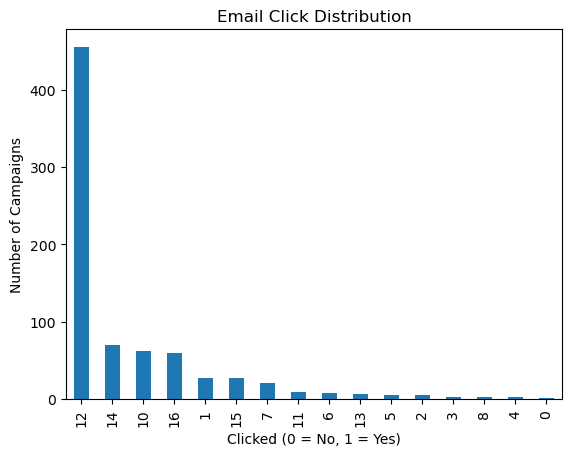

In [11]:
#Visualization – Click Distribution

df['target_audience'].value_counts().plot(kind='bar')
plt.title('Email Click Distribution')
plt.xlabel('Clicked (0 = No, 1 = Yes)')
plt.ylabel('Number of Campaigns')
plt.show()


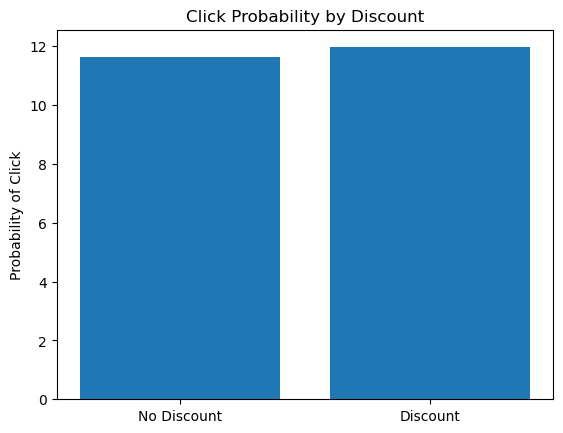

In [12]:
#Visualization – Conditional Click Probability

labels = ['No Discount', 'Discount']
values = [
    df[df['is_discount'] == 0]['target_audience'].mean(),
    df[df['is_discount'] == 1]['target_audience'].mean()
]

plt.bar(labels, values)
plt.title('Click Probability by Discount')
plt.ylabel('Probability of Click')
plt.show()


In [13]:
lift = p_click_given_discount / p_click
print(f"Discount emails increase click probability by {lift:.2f} times.")


Discount emails increase click probability by 1.03 times.
